In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/dataset.zip" -d "/content/drive/MyDrive/Colab Notebooks/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Colab Notebooks/dataset/Training/notumor/Tr-no_1020.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/dataset/Training/notumor/Tr-no_0458.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/dataset/Training/notumor/Tr-no_0504.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/dataset/Training/notumor/Tr-no_0262.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/dataset/Training/notumor/Tr-no_0276.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/dataset/Training/notumor/Tr-no_1168.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/dataset/Training/notumor/Tr-no_0510.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/dataset/Training/notumor/Tr-no_0538.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/dataset/Training/notumor/Tr-no_1140.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/dataset/Training/notumor/Tr-no_1154.jpg  
  inflati

In [ ]:
#OS libs
import os
import shutil
import itertools
import pathlib
from PIL import Image

#Data handling tools
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report

#Deep learning libs
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Activation , Dense , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam , Adamax
from tensorflow.keras import regularizers

#Warningds
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!find "/content/drive/MyDrive/Colab Notebooks/dataset" -name ".DS_Store" -delete

In [ ]:
train_data_path = '/content/drive/MyDrive/Colab Notebooks/dataset/Training'

filepaths = []
labels = []

folds = os.listdir(train_data_path)

for fold in folds:
  f_path = os.path.join(train_data_path, fold)
  for file in os.listdir(f_path):
    filepaths.append(os.path.join(f_path, file))
    labels.append(fold)

#concat data paths with labels
Fseries = pd.Series(filepaths, name='filepaths')
Lseries = pd.Series(labels, name='labels')
train_df = pd.concat([Fseries, Lseries], axis=1)

In [ ]:
train_df

,filepaths,labels
0,/content/drive/MyDrive/Colab Notebooks/dataset...,pituitary
1,/content/drive/MyDrive/Colab Notebooks/dataset...,pituitary
2,/content/drive/MyDrive/Colab Notebooks/dataset...,pituitary
3,/content/drive/MyDrive/Colab Notebooks/dataset...,pituitary
4,/content/drive/MyDrive/Colab Notebooks/dataset...,pituitary
...,...,...
5707,/content/drive/MyDrive/Colab Notebooks/dataset...,meningioma
5708,/content/drive/MyDrive/Colab Notebooks/dataset...,meningioma
5709,/content/drive/MyDrive/Colab Notebooks/dataset...,meningioma
5710,/content/drive/MyDrive/Colab Notebooks/dataset...,meningioma


In [ ]:
test_data_path = '/content/drive/MyDrive/Colab Notebooks/dataset/Testing'

filepaths = []
labels = []

folds = os.listdir(test_data_path)

for fold in folds:
  f_path = os.path.join(test_data_path, fold)
  for file in os.listdir(f_path):
    filepaths.append(os.path.join(f_path, file))
    labels.append(fold)

#concat data paths with labels
Fseries = pd.Series(filepaths, name='filepaths')
Lseries = pd.Series(labels, name='labels')
test_df = pd.concat([Fseries, Lseries], axis=1)

In [ ]:
test_df

,filepaths,labels
0,/content/drive/MyDrive/Colab Notebooks/dataset...,pituitary
1,/content/drive/MyDrive/Colab Notebooks/dataset...,pituitary
2,/content/drive/MyDrive/Colab Notebooks/dataset...,pituitary
3,/content/drive/MyDrive/Colab Notebooks/dataset...,pituitary
4,/content/drive/MyDrive/Colab Notebooks/dataset...,pituitary
...,...,...
1306,/content/drive/MyDrive/Colab Notebooks/dataset...,meningioma
1307,/content/drive/MyDrive/Colab Notebooks/dataset...,meningioma
1308,/content/drive/MyDrive/Colab Notebooks/dataset...,meningioma
1309,/content/drive/MyDrive/Colab Notebooks/dataset...,meningioma


Data Splitting

In [ ]:
valid , test = train_test_split(test_df, test_size=0.5, shuffle = True, random_state= 42)

In [ ]:
img_size = (224, 244)
batch_size = 16

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe(
    train_df,
    x_col='filepaths',
    y_col='labels',
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

valid_gen = ts_gen.flow_from_dataframe(
    valid,
    x_col='filepaths',
    y_col='labels',
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

test_gen = ts_gen.flow_from_dataframe(
    test,
    x_col='filepaths',
    y_col='labels',
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size
)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


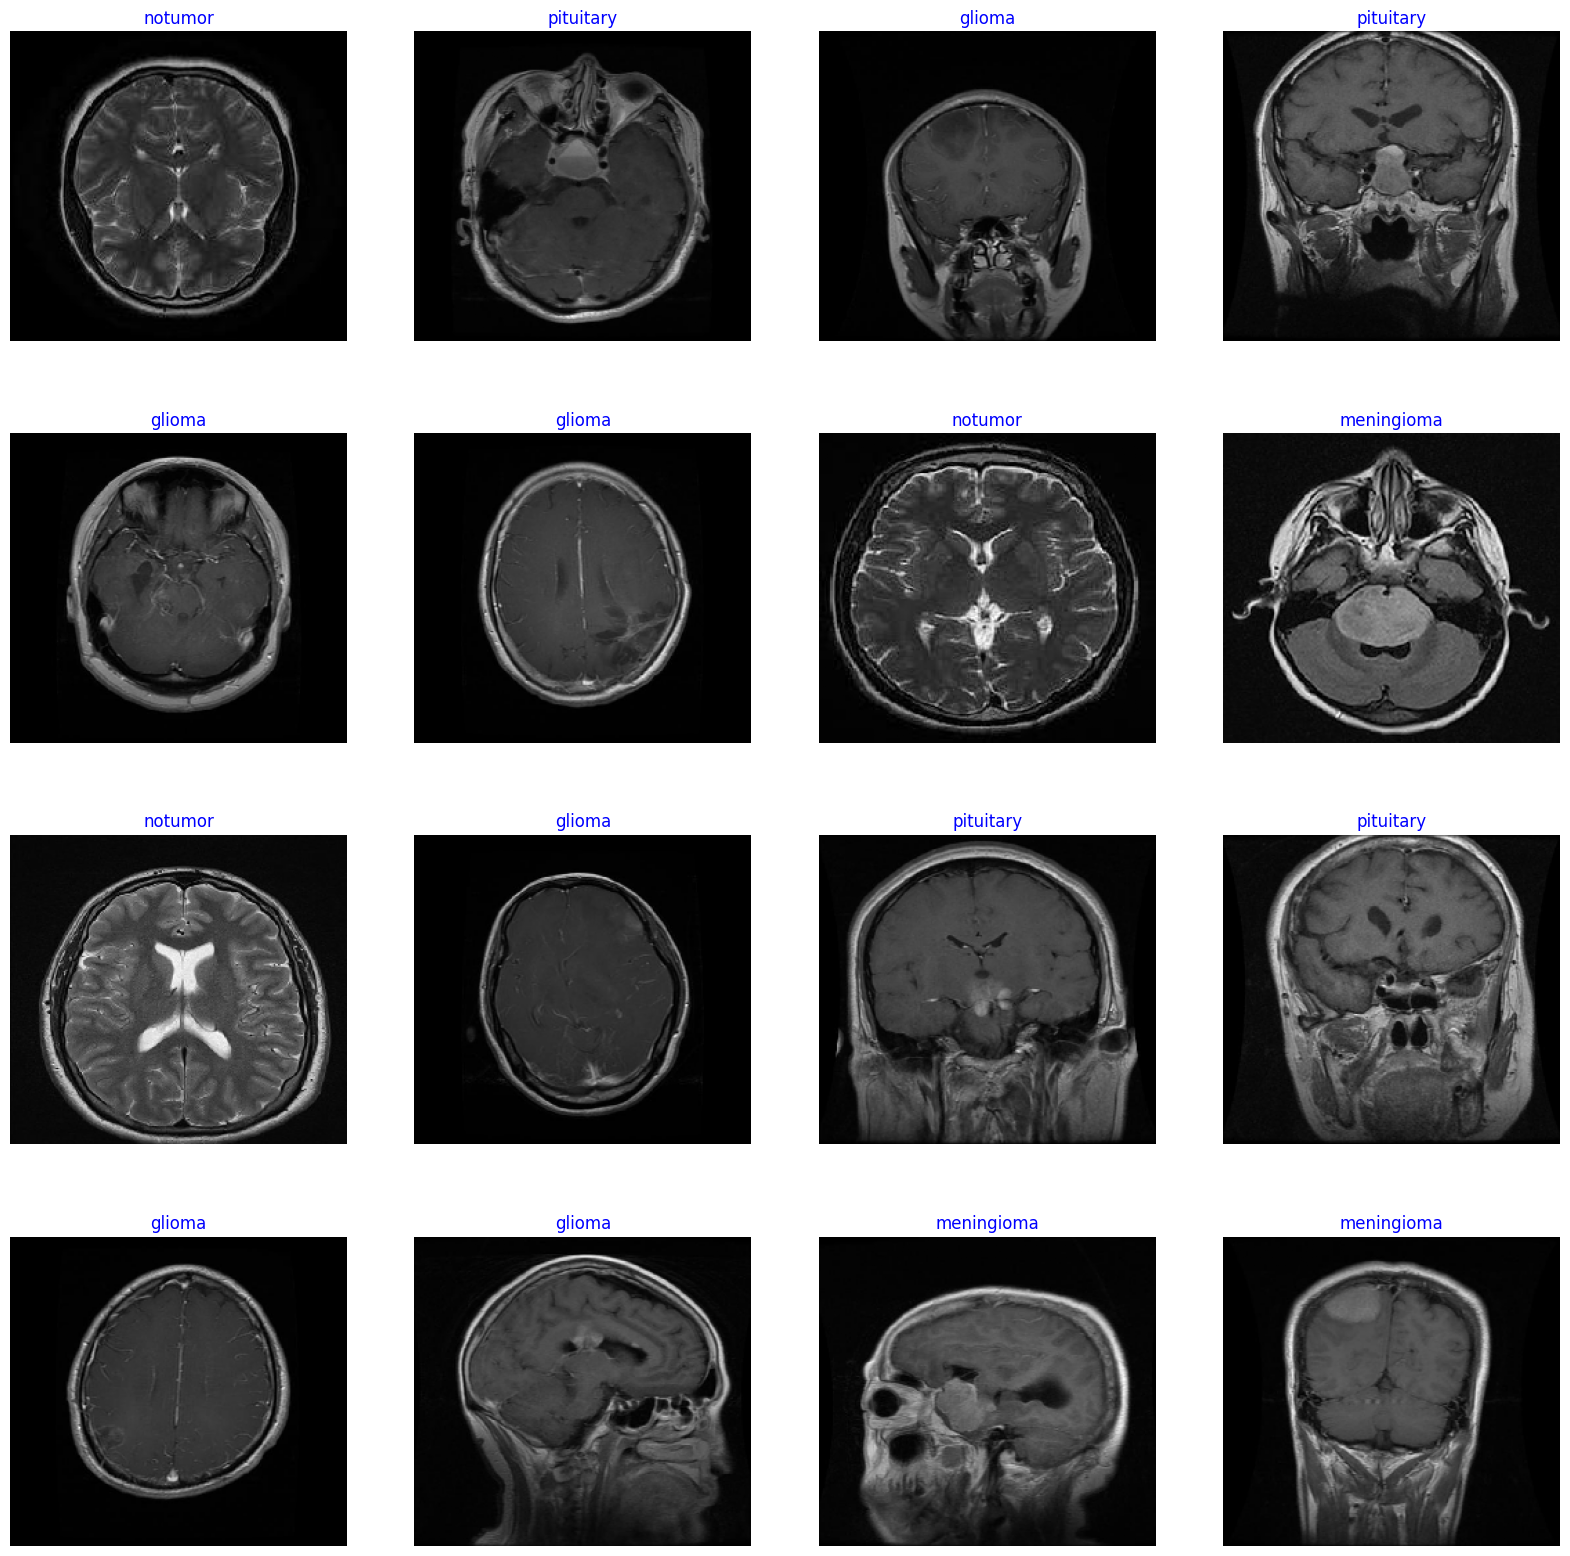

In [ ]:
gen_dict = train_gen.class_indices
classes = list(gen_dict.keys())
images, labels = next(train_gen)

plt.figure(figsize=(20,20))

for i in range(16):
  plt.subplot(4,4,i+1)
  image = images[i]/255
  plt.imshow(image)
  index = np.argmax(labels[i])
  class_name = classes[index]
  plt.title(class_name, color='blue', fontsize=12)
  plt.axis('off')
plt.show();

In [ ]:
img_shape = (img_size[0] , img_size[1] , 3)
num_class = len(classes)

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    include_top = False , weights = 'imagenet',
    input_shape = img_shape, pooling= 'max')

model = Sequential([
    base_model,
    BatchNormalization(axis= -1 , momentum= 0.99 , epsilon= 0.001),
    Dense(256, kernel_regularizer = regularizers.l2(0.016) , activity_regularizer = regularizers.l1(0.006),
         bias_regularizer= regularizers.l1(0.006) , activation = 'relu'),
    Dropout(rate= 0.4 , seed = 75),
    Dense(num_class , activation = 'softmax')
])

model.compile(Adamax(learning_rate = 0.001) , loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-b0 (Functional)  │ (None, 1280)           │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,253,396 (23.85 MB)

 Trainable params: 6,190,228 (23.61 MB)

 Non-trainable params: 63,168 (246.75 KB)

In [ ]:
Epochs = 10

history = model.fit(
    train_gen,
    epochs= Epochs,
    verbose=1,
    validation_data= valid_gen,
    shuffle=True
)

Epoch 1/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 140s 153ms/step - accuracy: 0.5192 - loss: 10.1862 - val_accuracy: 0.4412 - val_loss: 5.5198
Epoch 2/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 37s 104ms/step - accuracy: 0.4026 - loss: 5.0223 - val_accuracy: 0.4641 - val_loss: 3.6114
Epoch 3/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 36s 101ms/step - accuracy: 0.4614 - loss: 3.3228 - val_accuracy: 0.6595 - val_loss: 2.3714
Epoch 4/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 38s 107ms/step - accuracy: 0.6437 - loss: 2.2504 - val_accuracy: 0.6931 - val_loss: 1.7175
Epoch 5/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 37s 103ms/step - accuracy: 0.6769 - loss: 1.6530 - val_accuracy: 0.7618 - val_loss: 1.2359
Epoch 6/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 36s 102ms/step - accuracy: 0.6967 - loss: 1.3037 - val_accuracy: 0.7725 - val_loss: 0.9999
Epoch 7/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 35s 98ms/step - accuracy: 0.7010 - loss: 1.1118 - val_accuracy: 0.7679 - val_loss: 0.8814
Epoch 8/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 37s 102ms/step - accuracy: 0.7097 - loss: 

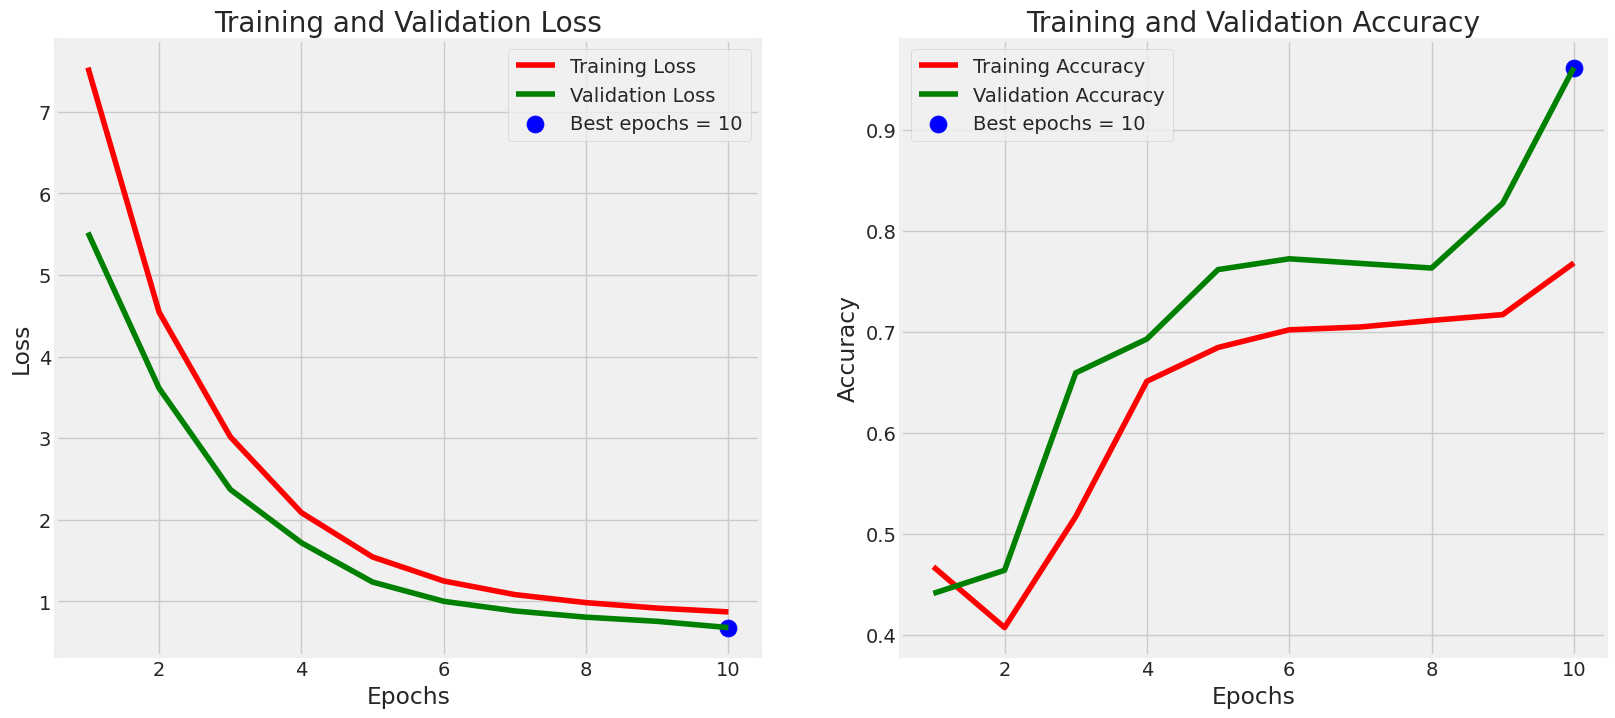

In [ ]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

index_acc = np.argmax(val_acc)
val_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(train_acc))]

loss_label = f'Best epochs = {str(index_loss +1)}'
acc_label = f'Best epochs = {str(index_acc + 1)}'

#Training history

plt.figure(figsize= (20,8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(Epochs , train_loss , 'r' , label = 'Training Loss')
plt.plot(Epochs , val_loss , 'g' , label = 'Validation Loss')
plt.scatter(index_loss + 1 , val_lowest , s = 150 , c = 'blue',label = loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Epochs , train_acc , 'r' , label = 'Training Accuracy')
plt.plot(Epochs , val_acc , 'g' , label = 'Validation Accuracy')
plt.scatter(index_acc + 1 , val_highest , s = 150 , c = 'blue',label = acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout
plt.show();

In [ ]:
train_score = model.evaluate(train_gen , steps =16 , verbose = 1)
valid_score = model.evaluate(valid_gen , steps = 16 , verbose = 1)
test_score = model.evaluate(test_gen , steps = 16 , verbose = 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.9516 - loss: 0.6887
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.9622 - loss: 0.6539
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.9790 - loss: 0.6580
Train Loss:  0.6835511326789856
Train Accuracy:  0.953125
--------------------
Validation Loss:  0.6852130889892578
Validation Accuracy:  0.9609375
--------------------
Test Loss:  0.6726972460746765
Test Accuracy:  0.953125


In [ ]:
preds = model.predict(test_gen)

y_pred = np.argmax(preds , axis = 1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step


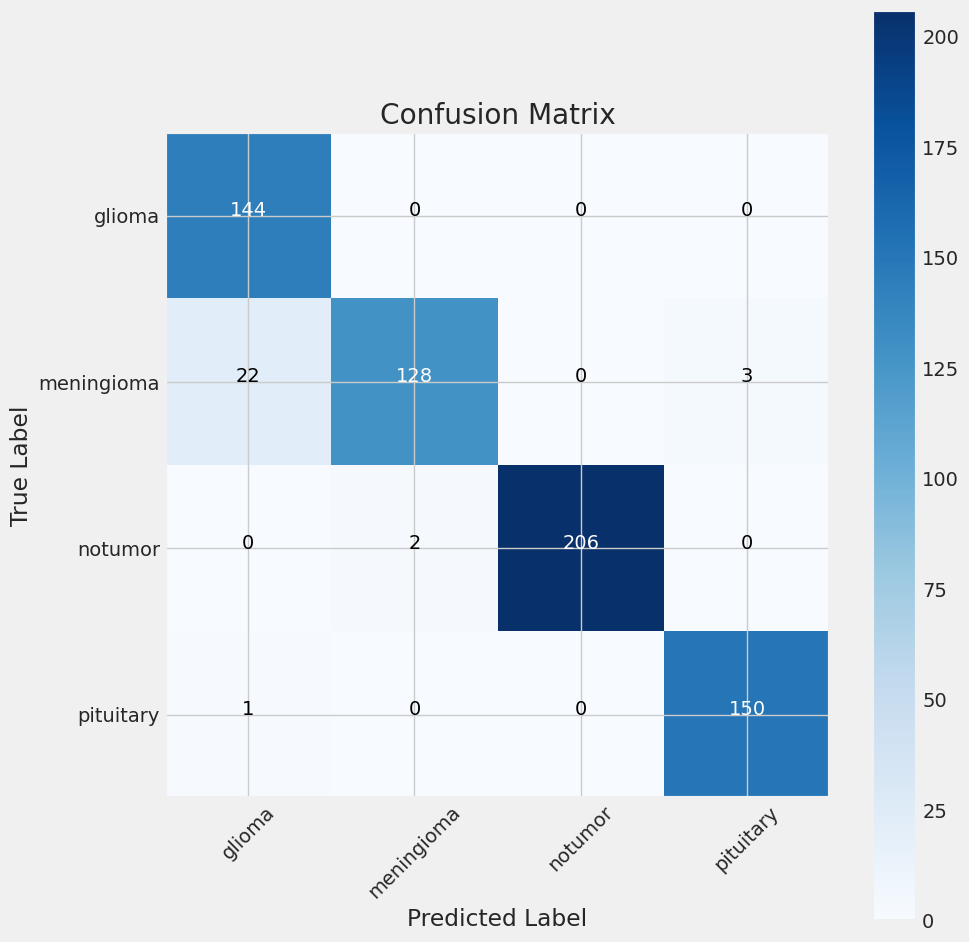

In [ ]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [ ]:
#Classification Report
print(classification_report(test_gen.classes, y_pred , target_names= classes ))

              precision    recall  f1-score   support

      glioma       0.86      1.00      0.93       144
  meningioma       0.98      0.84      0.90       153
     notumor       1.00      0.99      1.00       208
   pituitary       0.98      0.99      0.99       151

    accuracy                           0.96       656
   macro avg       0.96      0.96      0.95       656
weighted avg       0.96      0.96      0.96       656



In [ ]:
model.save("model.h5")

In [ ]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

In [ ]:
model = load_model('model.h5', compile=False)
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
gambar = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/Colab Notebooks/dataset/Testing/glioma/Te-glTr_0000.jpg', target_size=img_size)

In [ ]:
input_arr = tf.keras.preprocessing.image.img_to_array(gambar)

In [ ]:
input_arr = np.array([input_arr])
prediksi = model.predict(input_arr)
predicted_class = np.argmax(prediksi, axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step


In [ ]:
print(predicted_class)

[0]


In [ ]:
print(classes)

['glioma', 'meningioma', 'notumor', 'pituitary']


In [ ]:
names = [classes[i] for i in predicted_class]
print(names)

['glioma']
